In [1]:
"""
!pip install patchify
!pip install opencv-python
!pip install matplotlib

"""

'\n!pip install patchify\n!pip install opencv-python\n!pip install matplotlib\n'

In [2]:
import cv2
import matplotlib.pyplot as plt
from patchify import patchify
import tensorflow as tf
import os

In [2]:
filename_img = "C:/Users/RAZER/Desktop/Test/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0.2500_main.png"
filename_mask = "C:/Users/RAZER/Desktop/Test/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0.2500_mask.png"
image = cv2.imread(filename_img, flags=cv2.IMREAD_COLOR)
mask = cv2.imread(filename_mask, flags=cv2.IMREAD_COLOR)

(1991, 3626, 3)
(1991, 3626, 3)


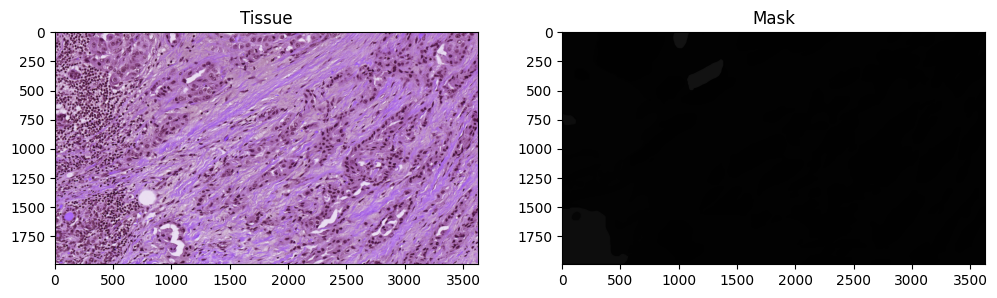

In [3]:

tissue_img = cv2.imread(filename_img)
tissue_img = cv2.cvtColor(tissue_img, cv2.COLOR_BGR2RGB)

mask_img = cv2.imread(filename_mask)
mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2RGB)

#Verify (tissue, mask) shape
print(tissue_img.shape)
print(mask_img.shape)


#Plot (tissue, mask) side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first image on the left subplot
axes[0].imshow(cv2.cvtColor(tissue_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Tissue')

# Plot the second image on the right subplot
axes[1].imshow(cv2.cvtColor(mask_img, cv2.COLOR_BGR2RGB))
axes[1].set_title('Mask')
plt.show()

In [5]:
patches_img = patchify(tissue_img, (150,150,3), step=100)

In [6]:
patches_img.shape

(19, 35, 1, 150, 150, 3)

In [7]:
row = patches_img.shape[0]
col = patches_img.shape[1]

In [8]:
gather_img = []

for i in range(row):
    for j in range(col):
        get_patches_img = patches_img[i,j,:,:,:]
        gather_img.append(get_patches_img)

In [9]:
print("Total slice/patch: ",len(gather_img))

Total slice/patch:  665


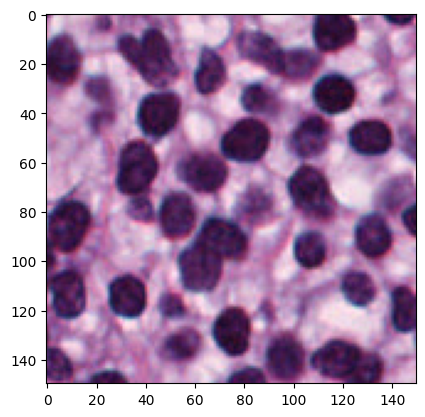

In [93]:
plt.imshow(gather_img[1][0])

#Image Show with Slice

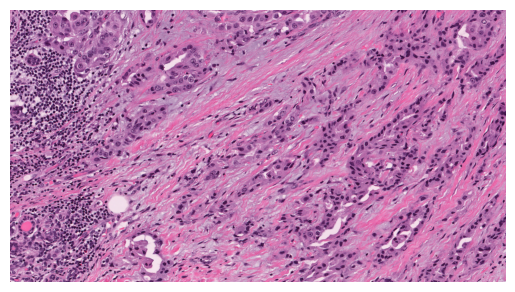

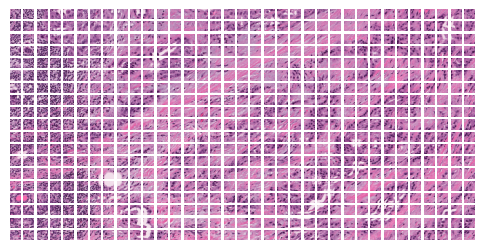

In [10]:
plt.imshow(tissue_img)
plt.axis('off')

fig1, ax1 = plt.subplots(nrows=row,ncols=col,figsize=(6,3))

a=0

for R in range(row):
    for C in range(col):
        ax1[R, C].imshow(gather_img[a][0])
        ax1[R,C].axis("off")
        a+=1
        

#Saving

In [12]:
saving_path = "C:/Users/RAZER/Desktop/Test/patch_file/"

a=0
for R in range(row):
    for C in range(col):
        status = cv2.imwrite(saving_path+str(R)+"_"+str(C)+'image.png',gather_img[a][0])
        print("Image written to file-system : ",status)
        a+=1

Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
I

In [5]:


image = cv2.imread(filename_img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define patch size and stride
patch_size = [100, 100]  # Specify the size of each patch (height x width)
# We are using non-overlapping patch
stride = [100, 100]  # Specify the stride for patch extraction (height x width)

# Use tf.image.extract_patches to extract patches
patches = tf.image.extract_patches(
    images=tf.expand_dims(image, axis=0),  # Add a batch dimension
    sizes=[1, *patch_size, 1],  # Add batch and channel dimensions
    strides=[1, *stride, 1],  # Add batch and channel dimensions
    rates=[1, 1, 1, 1],  # Default rates
    padding='VALID'  # Use 'VALID' padding to ensure no padding is added
)

# Reshape the extracted patches
num_patches = patches.shape[1] * patches.shape[2]
print("Number of Patches: ",num_patches)

patches = tf.reshape(patches, [num_patches, *patch_size, 3])  # Assuming 3 channels for RGB images










Number of Patches:  684


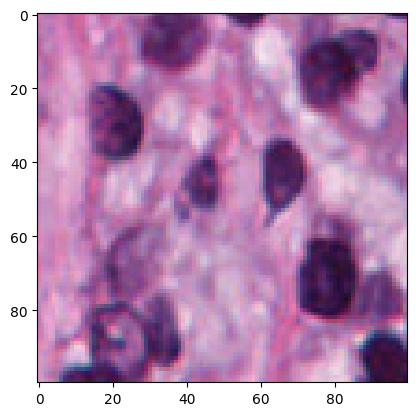

In [6]:
plt.imshow(patches[0].numpy())

In [7]:

#Getting WSI file name
wsi_file_name = os.path.basename(img_path)
wsi_file_name = os.path.splitext(wsi_file_name)[0]

#Writing patch in write_path
no_of_patches = 0
for patch in patches:
    no_of_patches = no_of_patches+1
    patch_file_name = (wsi_file_name + "_Patch_"+str(no_of_patches) + ".jpg")
    #patch is of type <class 'tensorflow.python.framework.ops.EagerTensor'> so converting to numpy ndarray
    cv2.imwrite(os.path.join(write_path, patch_file_name), patch.numpy())

print(f"Patch written: {no_of_patches} from WSI: {wsi_file_name}")


NameError: name 'os' is not defined

In [ ]:
# Reshape the extracted patches
num_patches = patches.shape[1] * patches.shape[2]

patches = tf.reshape(patches, [num_patches, *patch_size, 3])  # Assuming 3 channels for RGB images

# Now, 'patches' contains the extracted patches
print (f"{os.path.basename(wsi_path)} shape: {patches.shape}")
# print("Shape of each patch:", patches.shape)

In [ ]:
def wsi_to_patch(wsi_path):
    """
    :param wsi_path: Path of the WSI to extract patch
    :return: list of extracted patches of type <class 'tensorflow.python.framework.ops.EagerTensor'>
            Can be converted to numpy ndarray if any operation on the patch is not working correctly
    """
    
    image = cv2.imread(wsi_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Define patch size and stride
    patch_size = [512, 512]  # Specify the size of each patch (height x width)
    # We are using non-overlapping patch
    stride = [512, 512]  # Specify the stride for patch extraction (height x width)
    
    # Use tf.image.extract_patches to extract patches
    patches = tf.image.extract_patches(
        images=tf.expand_dims(image, axis=0),  # Add a batch dimension
        sizes=[1, *patch_size, 1],  # Add batch and channel dimensions
        strides=[1, *stride, 1],  # Add batch and channel dimensions
        rates=[1, 1, 1, 1],  # Default rates
        padding='VALID'  # Use 'VALID' padding to ensure no padding is added
    )
    
    # Reshape the extracted patches
    num_patches = patches.shape[1] * patches.shape[2]
    
    patches = tf.reshape(patches, [num_patches, *patch_size, 3])  # Assuming 3 channels for RGB images
    
    # Now, 'patches' contains the extracted patches
    print (f"{os.path.basename(wsi_path)} shape: {patches.shape}")
    # print("Shape of each patch:", patches.shape)
    
    return patches

In [ ]:
def write_patch(patches, img_path, write_path):
    """
    :param patches: a list of patches 
    :param img_path: the path of the patch
    :param write_path: the path to write the single patch
    :return: void
    """
    #Getting WSI file name
    wsi_file_name = os.path.basename(img_path)
    wsi_file_name = os.path.splitext(wsi_file_name)[0]
    
    #Writing patch in write_path
    no_of_patches = 0
    for patch in patches:
        no_of_patches = no_of_patches+1
        patch_file_name = (wsi_file_name + "_Patch_"+str(no_of_patches) + ".jpg")
        #patch is of type <class 'tensorflow.python.framework.ops.EagerTensor'> so converting to numpy ndarray
        cv2.imwrite(os.path.join(write_path, patch_file_name), patch.numpy())
    
    print(f"Patch written: {no_of_patches} from WSI: {wsi_file_name}")
    
    return no_of_patches